In [100]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
from pylab import plot, show
import pickle
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

%matplotlib inline

In [111]:
df_bank=pd.read_csv('bank-additional-full.csv', sep=';')
df_bank.rename(columns = {'emp.var.rate':'empvarrate', 'cons.price.idx':'conspriceidx',
                           'cons.conf.idx':'consconfidx','nr.employed':'nremployed'}, inplace = True)
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           41188 non-null  int64  
 1   job           41188 non-null  object 
 2   marital       41188 non-null  object 
 3   education     41188 non-null  object 
 4   default       41188 non-null  object 
 5   housing       41188 non-null  object 
 6   loan          41188 non-null  object 
 7   contact       41188 non-null  object 
 8   month         41188 non-null  object 
 9   day_of_week   41188 non-null  object 
 10  duration      41188 non-null  int64  
 11  campaign      41188 non-null  int64  
 12  pdays         41188 non-null  int64  
 13  previous      41188 non-null  int64  
 14  poutcome      41188 non-null  object 
 15  empvarrate    41188 non-null  float64
 16  conspriceidx  41188 non-null  float64
 17  consconfidx   41188 non-null  float64
 18  euribor3m     41188 non-nu

In [114]:
df_bank['pdays']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
41183   NaN
41184   NaN
41185   NaN
41186   NaN
41187   NaN
Name: pdays, Length: 41188, dtype: float64

In [112]:
df_bank['pdays'] = df_bank['pdays'].replace(999,np.nan)
imp = IterativeImputer(max_iter=10, random_state=0)
X_imputed = imp.fit_transform(df_bank['pdays'])

ValueError: Expected 2D array, got 1D array instead:
array=[nan nan nan ... nan nan nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<AxesSubplot:xlabel='pdays'>

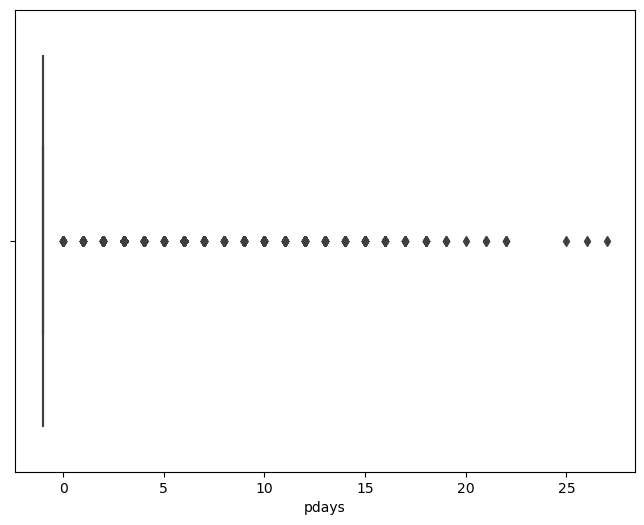

In [82]:
def find_outliers_IQR(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return data[(data > upper_bound) | (data < lower_bound)]

outliers = find_outliers_IQR(df_bank['pdays'])
sns.boxplot(x=df_bank['pdays'])

In [83]:
outliers

24108     6
24264     4
24279     4
24397     3
24482     4
         ..
41163     4
41164    10
41174     1
41178     6
41182     9
Name: pdays, Length: 1515, dtype: int64

<AxesSubplot:xlabel='empvarrate', ylabel='count'>

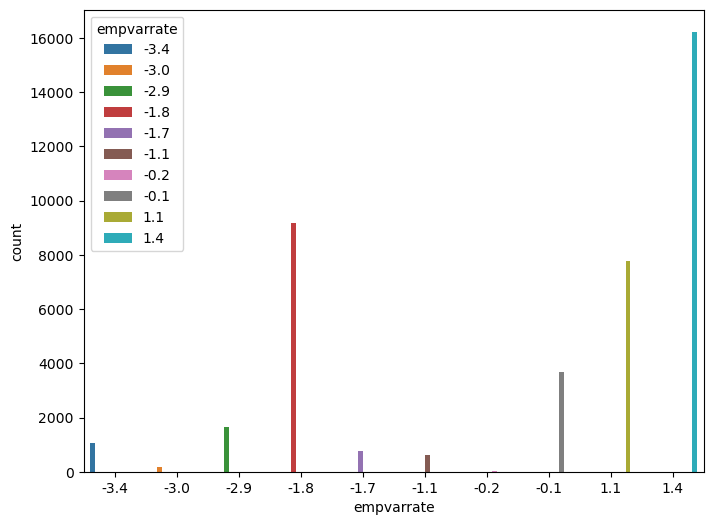

In [84]:
#plotting employment variation rate - quarterly indicator emp.var.rate
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='empvarrate', hue='empvarrate', data=df_bank)

<AxesSubplot:xlabel='previous', ylabel='count'>

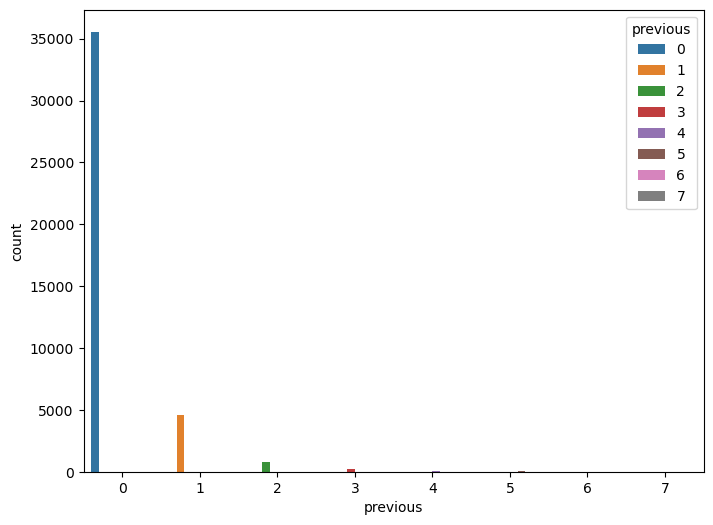

In [85]:
#previous: number of contacts performed before this campaign and for this client (numeric)
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='previous',hue='previous',data=df_bank)

<AxesSubplot:xlabel='duration'>

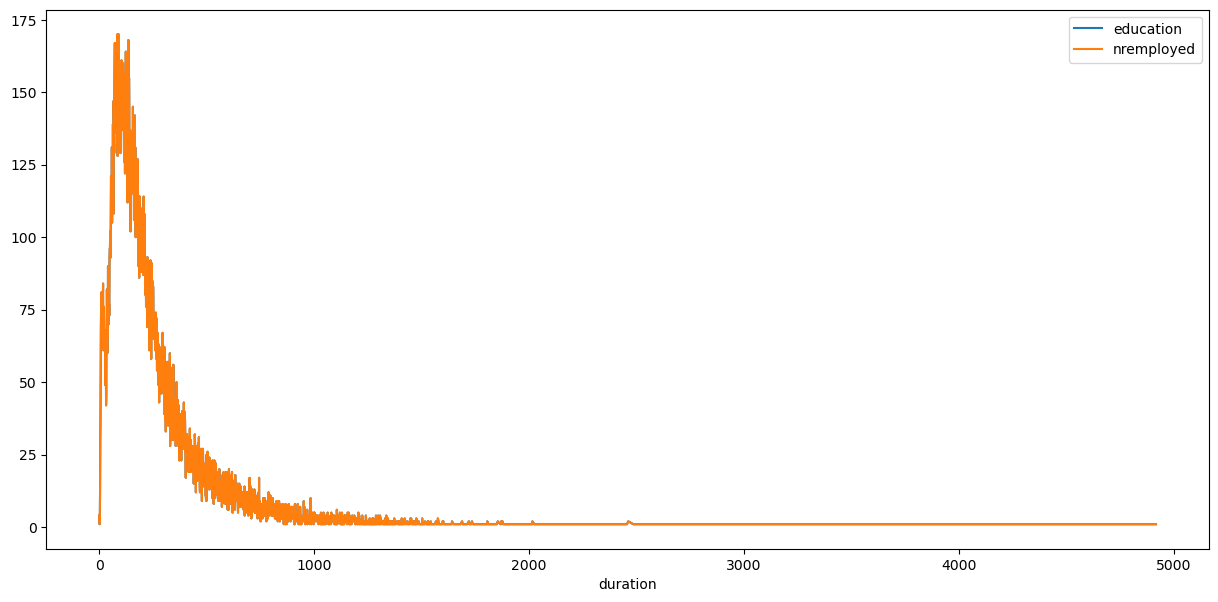

In [86]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df_bank.groupby(['duration']).count()[['education','nremployed']].plot(ax=ax)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'empvarrate'}>,
        <AxesSubplot:title={'center':'conspriceidx'}>,
        <AxesSubplot:title={'center':'consconfidx'}>],
       [<AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nremployed'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

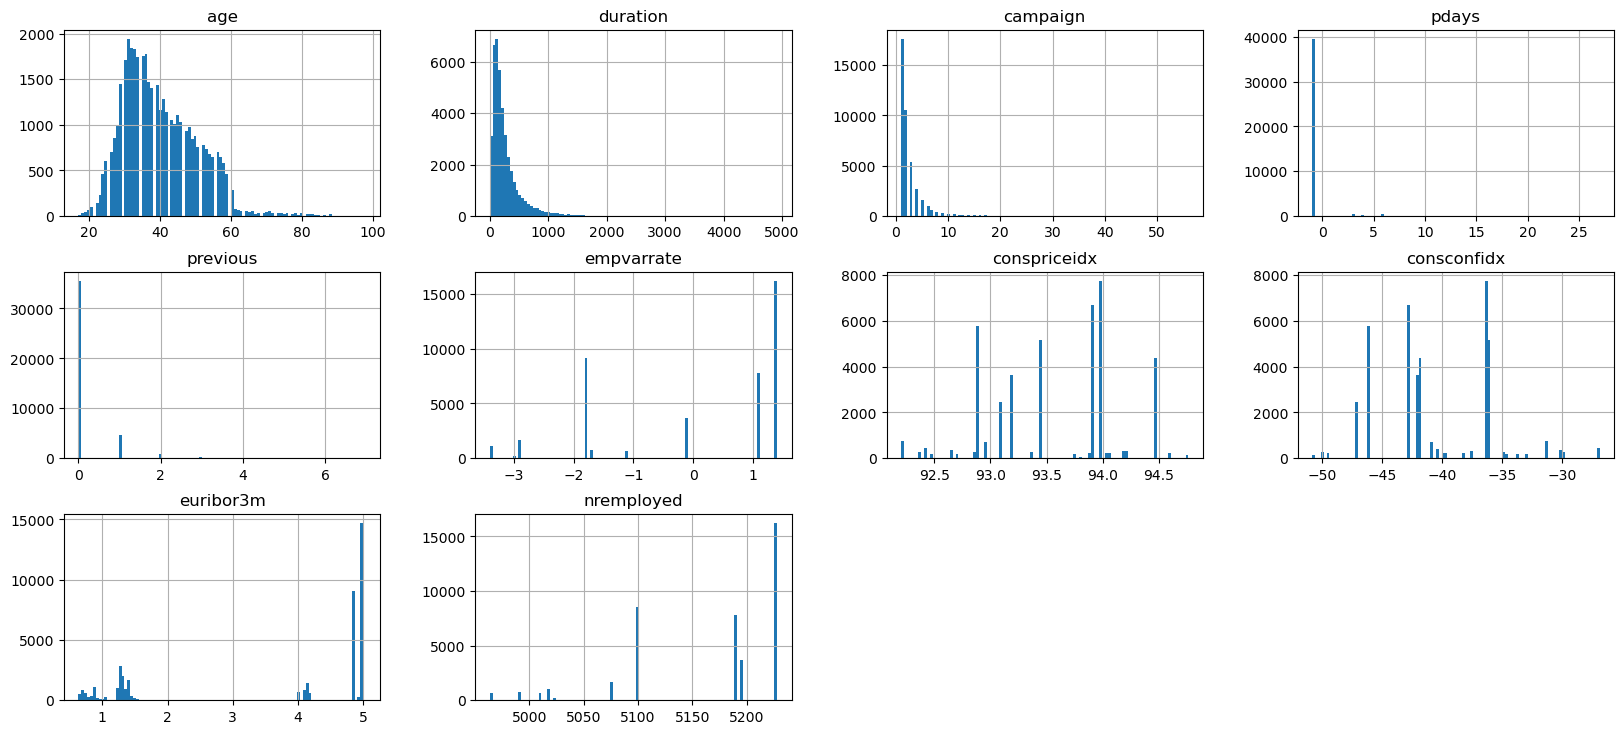

In [87]:
df_bank.hist(bins=100, figsize= (20,15),layout=(5,4))

<AxesSubplot:>

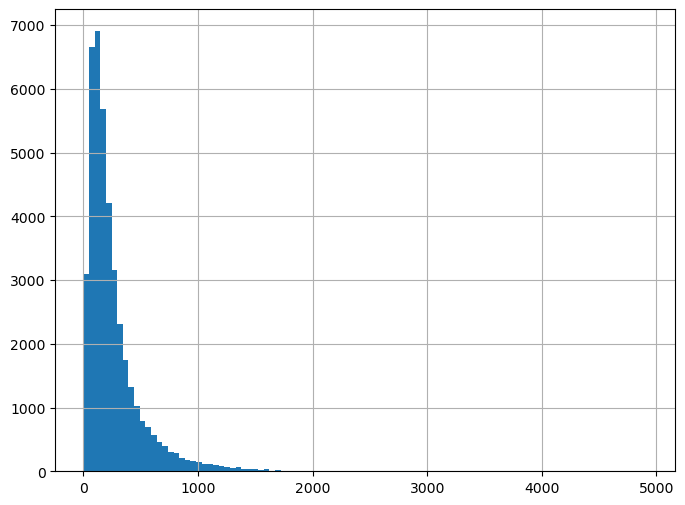

In [88]:
# Another way to plot a histogram of duration is shown below
df_bank['duration'].hist(bins=100)

In [89]:
#Describing dummy keys of particular column
y_n_lookup ={'yes' : 1, 'no' : 0}
df_bank['y_dummy'] = df_bank['y'].map(lambda x: y_n_lookup[x])
df_bank['y_dummy'].value_counts()

0    36548
1     4640
Name: y_dummy, dtype: int64

In [90]:
#getting marital status of groupby people
age_group_names = ['young', 'lower middle', 'middle', 'senior']
df_bank['age_binned'] = pd.qcut(df_bank['age'], 4, labels = age_group_names)
df_bank['age_binned'].value_counts()
gb_marital_age = df_bank['y_dummy'].groupby([df_bank['marital'],df_bank['age_binned']] ) 
gb_marital_age.mean()

young           11176
middle          10140
lower middle     9999
senior           9873
Name: age_binned, dtype: int64

marital   age_binned  
divorced  young           0.074148
          lower middle    0.093649
          middle          0.082001
          senior          0.134097
married   young           0.098465
          lower middle    0.092071
          middle          0.075517
          senior          0.135865
single    young           0.166407
          lower middle    0.117267
          middle          0.087753
          senior          0.108974
unknown   young           0.250000
          lower middle    0.041667
          middle          0.333333
          senior          0.115385
Name: y_dummy, dtype: float64

In [91]:
df_bank['age_binned'].value_counts()

young           11176
middle          10140
lower middle     9999
senior           9873
Name: age_binned, dtype: int64

In [92]:
#unstack (Pivot a level of the (necessarily hierarchical) index labels) groupby marital status
gb_marital_age.mean().unstack()

age_binned,young,lower middle,middle,senior
marital,,,,
divorced,0.074148,0.093649,0.082001,0.134097
married,0.098465,0.092071,0.075517,0.135865
single,0.166407,0.117267,0.087753,0.108974
unknown,0.250000,0.041667,0.333333,0.115385


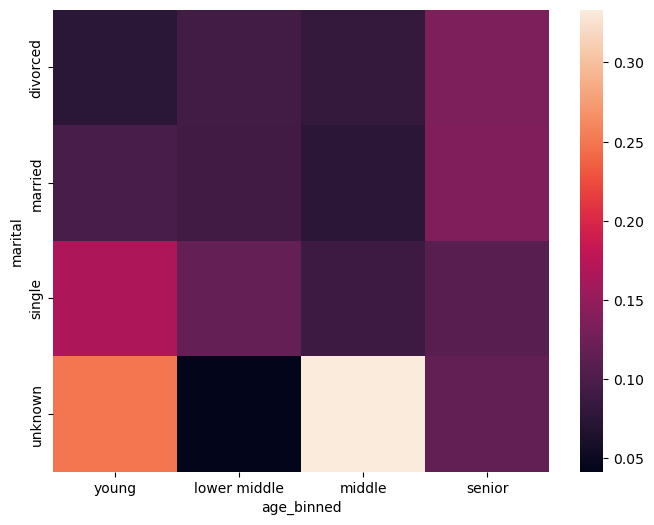

In [93]:
ax = sns.heatmap(gb_marital_age.mean().unstack())
plt.show()

In [94]:
#getting life stage of age group
df_bank['life_stage'] = df_bank.apply(lambda x: x['age_binned'] +' & ' + x['marital'], axis = 1)
df_bank['life_stage'].value_counts() 

senior & married           7478
middle & married           7111
young & single             6418
lower middle & married     6104
young & married            4235
lower middle & single      2942
senior & divorced          1745
middle & single            1584
middle & divorced          1439
lower middle & divorced     929
senior & single             624
young & divorced            499
senior & unknown             26
lower middle & unknown       24
young & unknown              24
middle & unknown              6
Name: life_stage, dtype: int64

In [95]:
#Consider some important features
features_columns=['job','education', 'default', 'housing', 'loan',
           'month', 'day_of_week', 'duration', 'pdays'
       'previous', 'poutcome', 'empvarrate', 'conspriceidx',
       'consconfidx', 'euribor3m','y']

In [96]:
#importing the packeges
from IPython.core.interactiveshell import InteractiveShell     #An enhanced, interactive shell for Python
#‘all’, ‘last’, ‘last_expr’ or ‘none’, ‘last_expr_or_assign’
#specifying which nodes should be run interactively 
import plotly 
InteractiveShell.ast_node_interactivity = "all"   #Options:	'all','last','last_expr','none','last_expr_or_assign'

import numpy as np # linear algebra
import pandas as pd # data processing

In [97]:
#Encode the categorical data
for col in df_bank.columns:
    if df_bank[col].dtype==object:
           df_bank[col]=df_bank[col].astype('category')
           df_bank[col]=df_bank[col].cat.codes

In [98]:
# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler
features_columns_df=df_bank[features_columns]
array = features_columns_df.values
# separate array into input and output components
X = array[:,0:15]
Y = array[:,15]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

KeyError: "['pdaysprevious'] not in index"

In [ ]:

# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = features_columns_df.iloc[:,0:15]
Y = features_columns_df.iloc[:,15]
# split data into train and test sets
seed = 7
test_size = 0.02
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
rf = RandomForestClassifier(random_state = 42)  # random_state is the seed used by the random number generator
#fitting the model
model = rf.fit(X_train, y_train)
# Find feature importance, print it
raw_feature_importance = model.feature_importances_.tolist()
feature_importance = [round(val * 100.0, 2) for val in raw_feature_importance]
print(zip(features_columns_df.columns, feature_importance))

In [ ]:
#Getting the score of feature matrix and its target values 
model.score(X_test,y_test)

0.8895631067961165

In [ ]:
from sklearn.metrics import classification_report
# Model Prediction 
predictions = model.predict(X_test)
#Print the classification report
print(classification_report(y_true =y_test,y_pred = predictions))
np.sum(predictions)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       732
           1       0.51      0.42      0.46        92

    accuracy                           0.89       824
   macro avg       0.72      0.69      0.70       824
weighted avg       0.88      0.89      0.89       824



77

(0.0, 1.0)

(0.0, 1.0)

Text(0.5, 0, 'False Positive Rate or (1 - Specifity)')

Text(0, 0.5, 'True Positive Rate or (Sensitivity)')

Text(0.5, 1.0, 'Receiver Operating Characteristic')

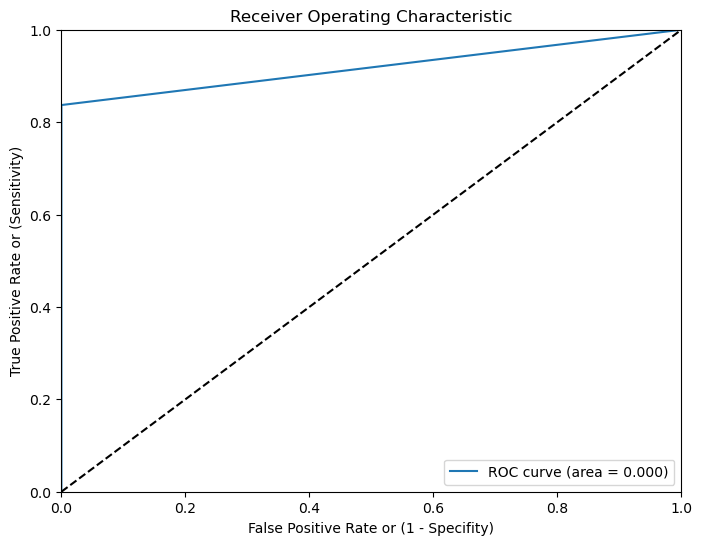

In [ ]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_true=sorted(y_test)
y_score=sorted(predictions)
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(y_true, y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

C:\Users\zhanq\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
C:\Users\zhanq\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
C:\Users\z

 LR : 0.906696 (0.004618)
 Decission Tree : 0.890842 (0.002736)
 Random Forest : 0.911819 (0.002827)
 XGBoost : 0.914538 (0.002838)
 SVM : 0.904535 (0.005250)


Text(0.5, 0.98, ' Algorithm Comparison ')

{'whiskers': [<matplotlib.lines.Line2D at 0x25607995a60>,
 'caps': [<matplotlib.lines.Line2D at 0x25609f84b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x25607995790>,
 'medians': [<matplotlib.lines.Line2D at 0x25609f70790>,
 'fliers': [<matplotlib.lines.Line2D at 0x25607b86820>,
 'means': []}

[Text(1, 0, ' LR '),
 Text(2, 0, ' Decission Tree '),
 Text(3, 0, ' Random Forest '),
 Text(4, 0, ' XGBoost '),
 Text(5, 0, ' SVM ')]

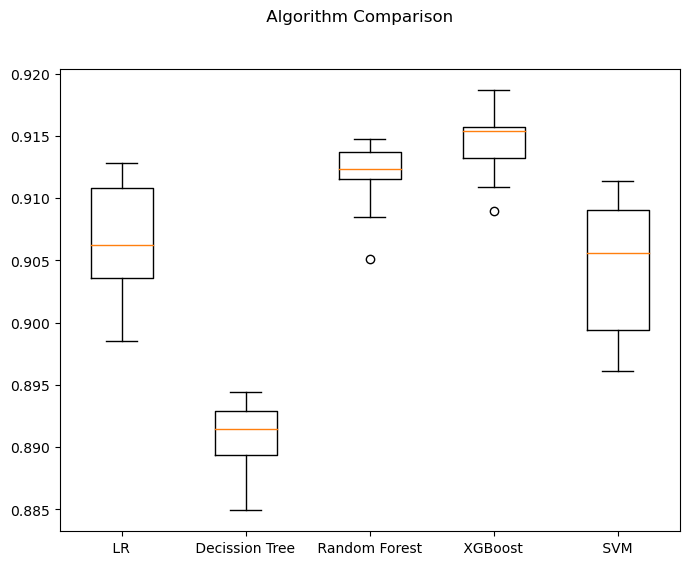

In [99]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# split data into X and y
X = features_columns_df.iloc[:,0:15]
Y = features_columns_df.iloc[:,15]
# prepare models
models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' Decission Tree ' , DecisionTreeClassifier()))
models.append(( ' Random Forest ' , RandomForestClassifier()))
models.append(( ' XGBoost ' , XGBClassifier()))
models.append(( ' SVM ' , SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

##### LDA and Logistic Regression gets best performance

In [57]:
# LDA model fits
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X, Y)

# Logistic regression model fits
lr = LogisticRegression()
lr.fit(X,Y)

LinearDiscriminantAnalysis(n_components=1)

C:\Users\zhanq\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [58]:
# Save best model (LDA)
with open('LDA_model.pkl','wb') as f:
    pickle.dump(lda,f)

# Save best model (Logistic Regression)
with open('LR_model.pkl','wb') as f:
    pickle.dump(lr,f)

In [1]:
import pickle
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard.custom import *
with open("LR_model.pkl", "rb") as f:
    model = pickle.load(f)
ExplainerDashboard(ClassifierExplainer(model, X_test, y_test)).run()

NameError: name 'X_test' is not defined

In [63]:
import dill
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard.custom import *
explainer = ClassifierExplainer(lda, X_test, y_test)
# building an ExplainerDashboard ensures that all necessary properties 
# get calculated:
db = ExplainerDashboard(explainer, [ShapDependenceComposite, WhatIfComposite],
     title='Awesome Dashboard', hide_whatifpdp=True)
# store both the explainer and the dashboard configuration:
explainer.dump('explainer.dill')
db.to_yaml("dashboard.yaml")                                                                                                                                                                                                                                              

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...


  0%|          | 0/824 [00:00<?, ?it/s]

Calculating dependencies...
Calculating prediction probabilities...
Calculating metrics...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Dumping configuration .yaml to c:\Users\zhanq\Desktop\Data_Glacier\Project\Bank_Marketing\dashboard.yaml...
